In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pycaret
!pip install catboost
!pip install lightgbm

In [2]:
import pandas as pd
from pycaret.classification import *

In [3]:
data = pd.read_csv('/content/bow-dataset-1ngram.csv')

In [4]:
# process data and setup dataset to experiment with pycaret
experiment = setup(data = data.loc[:, data.columns != 'Text'],  
                   target = 'Difficulty', 
                   numeric_features = ['SYM', 'INTJ'],
                   train_size = 0.8, 
                   fold = 5,
                   pca = True,
                   fix_imbalance = True,
                   normalize = True,
                   use_gpu = True, 
                   silent = True,
                   session_id = 707)

IntProgress(value=0, description='Processing: ', max=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,09:37:23
Status,. . . . . . . . . . . . . . . . . .,Preprocessing Data


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-7b3d93ad25b2>", line 11, in <module>
    session_id=707)
  File "/usr/local/lib/python3.7/dist-packages/pycaret/classification.py", line 654, in setup
    profile_kwargs=profile_kwargs,
  File "/usr/local/lib/python3.7/dist-packages/pycaret/internal/tabular.py", line 1329, in setup
    train_data = prep_pipe.fit_transform(train_data)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 367, in fit_transform
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 296, in _fit
    **fit_params_steps[name])
  File "/usr/local/lib/python3.7/dist-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeli

KeyboardInterrupt: ignored

In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.5302,0.8410,0.5314,0.5295,0.5281,0.4344,0.4350,3.108
et,Extra Trees Classifier,0.5300,0.8441,0.5315,0.5304,0.5282,0.4343,0.4349,3.510
catboost,CatBoost Classifier,0.5029,0.8136,0.5056,0.5011,0.5012,0.4020,0.4022,35.704
lightgbm,Light Gradient Boosting Machine,0.4924,0.8107,0.4939,0.4911,0.4905,0.3890,0.3894,2.618
dt,Decision Tree Classifier,0.4603,0.6762,0.4634,0.4587,0.4588,0.3514,0.3516,0.378
gbc,Gradient Boosting Classifier,0.4060,0.7695,0.4066,0.4078,0.4053,0.2844,0.2849,12.342
knn,K Neighbors Classifier,0.3935,0.7193,0.3988,0.3894,0.3859,0.2720,0.2735,1.712
lr,Logistic Regression,0.3667,0.7470,0.3760,0.3613,0.3552,0.2411,0.2433,2.044
ada,Ada Boost Classifier,0.3413,0.6808,0.3490,0.3352,0.3319,0.2108,0.2123,0.922
lda,Linear Discriminant Analysis,0.3411,0.7209,0.3479,0.3458,0.3351,0.2094,0.2113,0.370


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=707, verbose=0,
                       warm_start=False)

In [ ]:
# Create model with Random Forest as Classifier
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5095,0.8287,0.5097,0.5094,0.5069,0.4091,0.4099
1,0.5463,0.8534,0.5475,0.5456,0.5449,0.4541,0.4544
2,0.5279,0.8439,0.5318,0.5230,0.5236,0.4325,0.4330
3,0.5279,0.8361,0.5287,0.5299,0.5276,0.4315,0.4320
4,0.5392,0.8430,0.5395,0.5397,0.5373,0.4449,0.4457
Mean,0.5302,0.8410,0.5314,0.5295,0.5281,0.4344,0.4350
SD,0.0125,0.0082,0.0127,0.0127,0.0129,0.0152,0.0151


In [ ]:
# Tune the Random Forest model
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.3522,0.7036,0.3565,0.3551,0.3483,0.2218,0.2234
1,0.3672,0.7231,0.3708,0.3762,0.3695,0.2402,0.2408
2,0.3869,0.7295,0.3908,0.3833,0.3826,0.2631,0.2637
3,0.3644,0.7096,0.3679,0.3606,0.3609,0.2365,0.2369
4,0.3476,0.7077,0.3502,0.3483,0.3456,0.2160,0.2166
Mean,0.3637,0.7147,0.3672,0.3647,0.3614,0.2355,0.2363
SD,0.0137,0.0099,0.0140,0.0131,0.0137,0.0165,0.0163


In [ ]:
# Bag the Random Forest model to get better metrics
bagged_rf = ensemble_model(rf, method = 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5150,0.8275,0.5172,0.5155,0.5127,0.4158,0.4166
1,0.5484,0.8505,0.5515,0.5470,0.5458,0.4569,0.4575
2,0.5320,0.8434,0.5348,0.5279,0.5278,0.4370,0.4376
3,0.5116,0.8321,0.5140,0.5119,0.5109,0.4121,0.4124
4,0.5372,0.8383,0.5384,0.5371,0.5345,0.4427,0.4435
Mean,0.5288,0.8384,0.5312,0.5279,0.5264,0.4329,0.4335
SD,0.0138,0.0081,0.0139,0.0131,0.0132,0.0168,0.0169


In [ ]:
top3 = compare_models(n_select = 3)
stacker = stack_models(top3)

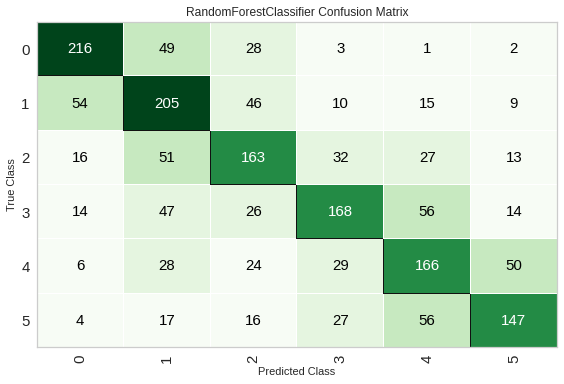

In [ ]:
# Create Confusion Matrix for the simple Random Forest model
plot_model(rf, plot = 'confusion_matrix')

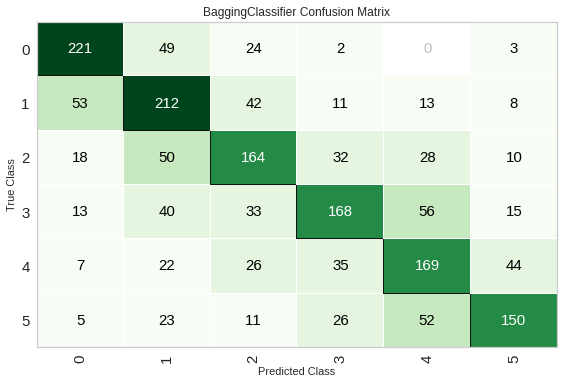

In [ ]:
# Create Confusion Matrix for the bagged model to see differences with the basic one and where precision changes
plot_model(bagged_rf, plot = 'confusion_matrix')